In [1]:
from keras import layers
from keras import models
from keras import datasets
from keras import optimizers


from tensorflow import  keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
x_train = train_images.astype('float32') / 255
x_test = test_images.astype('float32') / 255


Number of Class:


In [6]:
len(np.unique(train_labels))

10

In [7]:
len(np.unique(test_labels))

10

In [8]:
y_train = keras.utils.to_categorical(train_labels,num_classes=10)
y_test = keras.utils.to_categorical(test_labels,num_classes=10)


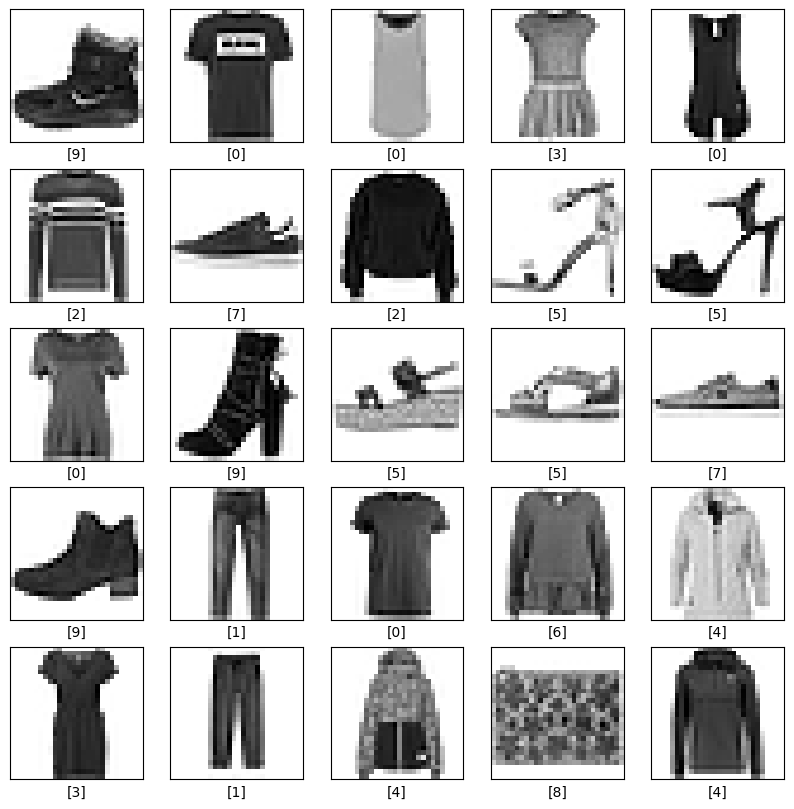

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()


In [10]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape= (28,28)),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]

)

In [11]:
opt_model = optimizers.Nadam(learning_rate = 0.005, beta_1 = 0.9 , beta_2 = 0.99)
model.compile(

              optimizer=opt_model,
              loss = 'categorical_crossentropy',
              metrics = 'acc'
)

In [12]:
history = model.fit(
    x_train , y_train, batch_size = 128 , epochs= 100,
    validation_data = (x_test , y_test)
)

Epoch 1/100
469/469 [==============================] - 8s 6ms/step - loss: 0.4911 - acc: 0.8251 - val_loss: 0.4162 - val_acc: 0.8505
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3596 - acc: 0.8690 - val_loss: 0.3891 - val_acc: 0.8625
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3303 - acc: 0.8791 - val_loss: 0.3884 - val_acc: 0.8609
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3104 - acc: 0.8855 - val_loss: 0.3545 - val_acc: 0.8722
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2941 - acc: 0.8907 - val_loss: 0.3589 - val_acc: 0.8701
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2820 - acc: 0.8963 - val_loss: 0.3706 - val_acc: 0.8696
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2723 - acc: 0.8977 - val_loss: 0.3453 - val_acc: 0.8821
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


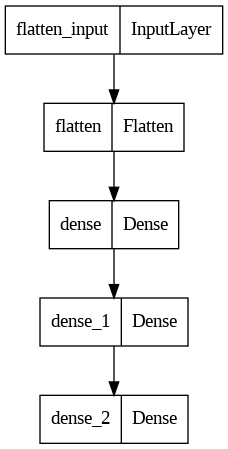

In [14]:
keras.utils.plot_model(model)

In [15]:
model.evaluate(x_test , y_test , verbose = 2)

313/313 - 1s - loss: 1.0794 - acc: 0.8773 - 861ms/epoch - 3ms/step


[1.0793973207473755, 0.8773000240325928]

In [16]:
model.save('model_fastion Mnist')

In [22]:
model2 = keras.Sequential(
      [
          layers.Conv2D(32,(3,3),input_shape= (28,28,1), activation='relu' , padding='valid'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2,2)),


          layers.Conv2D(64,(3,3),activation='relu',padding = 'valid'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2,2)),

          layers.Conv2D(128,(3,3),activation='relu'),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2,2), strides = 2),

          layers.GlobalAveragePooling2D(),
          layers.Dropout(0.2),
          layers.Dense(512,activation='relu'),
          layers.Dense(10,activation='softmax')
      ]
)

In [23]:
model2.compile(optimizer=keras.optimizers.Nadam(),
               loss = 'categorical_crossentropy',
               metrics = 'acc')

In [24]:
hist2 = model2.fit(
    x_train,  y_train, epochs = 100, batch_size= 128,
    validation_data=(x_test,y_test)
)

Epoch 1/100
469/469 [==============================] - 17s 14ms/step - loss: 0.4843 - acc: 0.8251 - val_loss: 0.8793 - val_acc: 0.6707
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.3408 - acc: 0.8753 - val_loss: 0.3608 - val_acc: 0.8653
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.2930 - acc: 0.8901 - val_loss: 0.3327 - val_acc: 0.8821
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2615 - acc: 0.9027 - val_loss: 0.3091 - val_acc: 0.8854
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2373 - acc: 0.9115 - val_loss: 0.3323 - val_acc: 0.8785
Epoch 6/100
469/469 [==============================] - 5s 12ms/step - loss: 0.2198 - acc: 0.9183 - val_loss: 0.3210 - val_acc: 0.8838
Epoch 7/100
469/469 [==============================] - 5s 12ms/step - loss: 0.2033 - acc: 0.9237 - val_loss: 0.3055 - val_acc: 0.8921
Epoch 8/100
469/469 [==============================] - 5s 11m

In [25]:
model2.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.6140 - acc: 0.9018 - 1s/epoch - 4ms/step


[0.6139516234397888, 0.9017999768257141]

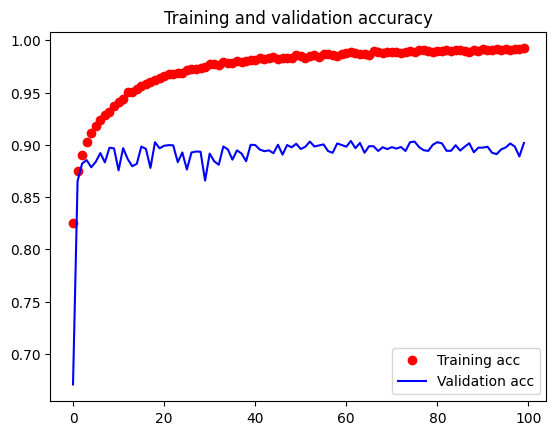

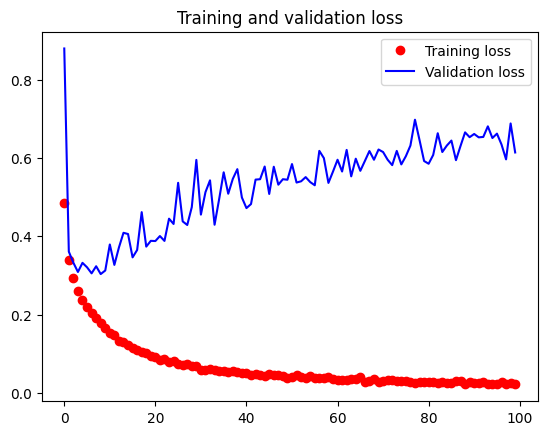

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = hist2.history['acc']
val_acc = hist2.history['val_acc']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [31]:
model2.save('Fashion Mnist-cnn')